In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from pykrige.rk import Krige
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pykrige.ok3d import OrdinaryKriging3D
from pykrige.uk3d import UniversalKriging3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
data = pd.read_csv("./data/data_ouest3.csv")

data_gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude,data.Latitude), 
                              crs='EPSG:2154').to_crs("EPSG:4326")

data_gdf['Longitude'] = data_gdf.geometry.x
data_gdf['Latitude'] = data_gdf.geometry.y

data = data_gdf.drop(columns = ['geometry']).copy()

In [4]:
# Step 1: Preparing the data
X = data[['Longitude', 'Latitude', 'Altitude']]
y = data[['FXI']]*3.6


# Sélectionner les colonnes pertinentes
latitude = data['Latitude'].values
longitude = data['Longitude'].values
altitude = data['Altitude'].values
FXI = data['FXI'].values * 3.6

In [5]:
# Step 2: Creating a kriging model with 3D support
param_dict = {
    "method": ["ordinary3d"],
    "variogram_model": ["linear", "power", "gaussian", "spherical"],
    # Adding more parameters for the variogram model might be necessary
}

In [6]:
# Création de l'objet Ordinary Kriging
OK_0 = UniversalKriging3D(longitude, latitude, altitude, FXI, variogram_model='linear', specified_drift=['regional_linear'],
                     verbose=False, enable_plotting=False)


In [7]:
# Création de l'objet Ordinary Kriging
OK = OrdinaryKriging3D(longitude, latitude, altitude, FXI, variogram_model='linear',
                     verbose=False, enable_plotting=False)


In [27]:
min_latitude=min(data['Latitude'])
min_longitude=min(data['Longitude'])
max_longitude=max(data['Longitude'])
max_latitude=max(data['Latitude'])
min_altitude=min(data['Altitude'])
max_altitude=max(data['Altitude'])
num_points=1000

In [28]:
# Step 4: Defining the Prediction Grid
longitude_range = np.linspace(min_longitude, max_longitude, num_points)
latitude_range = np.linspace(min_latitude, max_latitude, num_points)


In [29]:


prediction_points = np.array(np.meshgrid(longitude_range, latitude_range)).T.reshape(-1, 2)

with open('./data/alti_1000.npy', 'rb') as f:
    a = np.load(f)

In [30]:
# Step 5: Making Predictions
predicted_FXI = OK.execute("points", prediction_points[:,0], prediction_points[:,1], a)


In [31]:
k3d3 = predicted_FXI[0].reshape(num_points,num_points).T

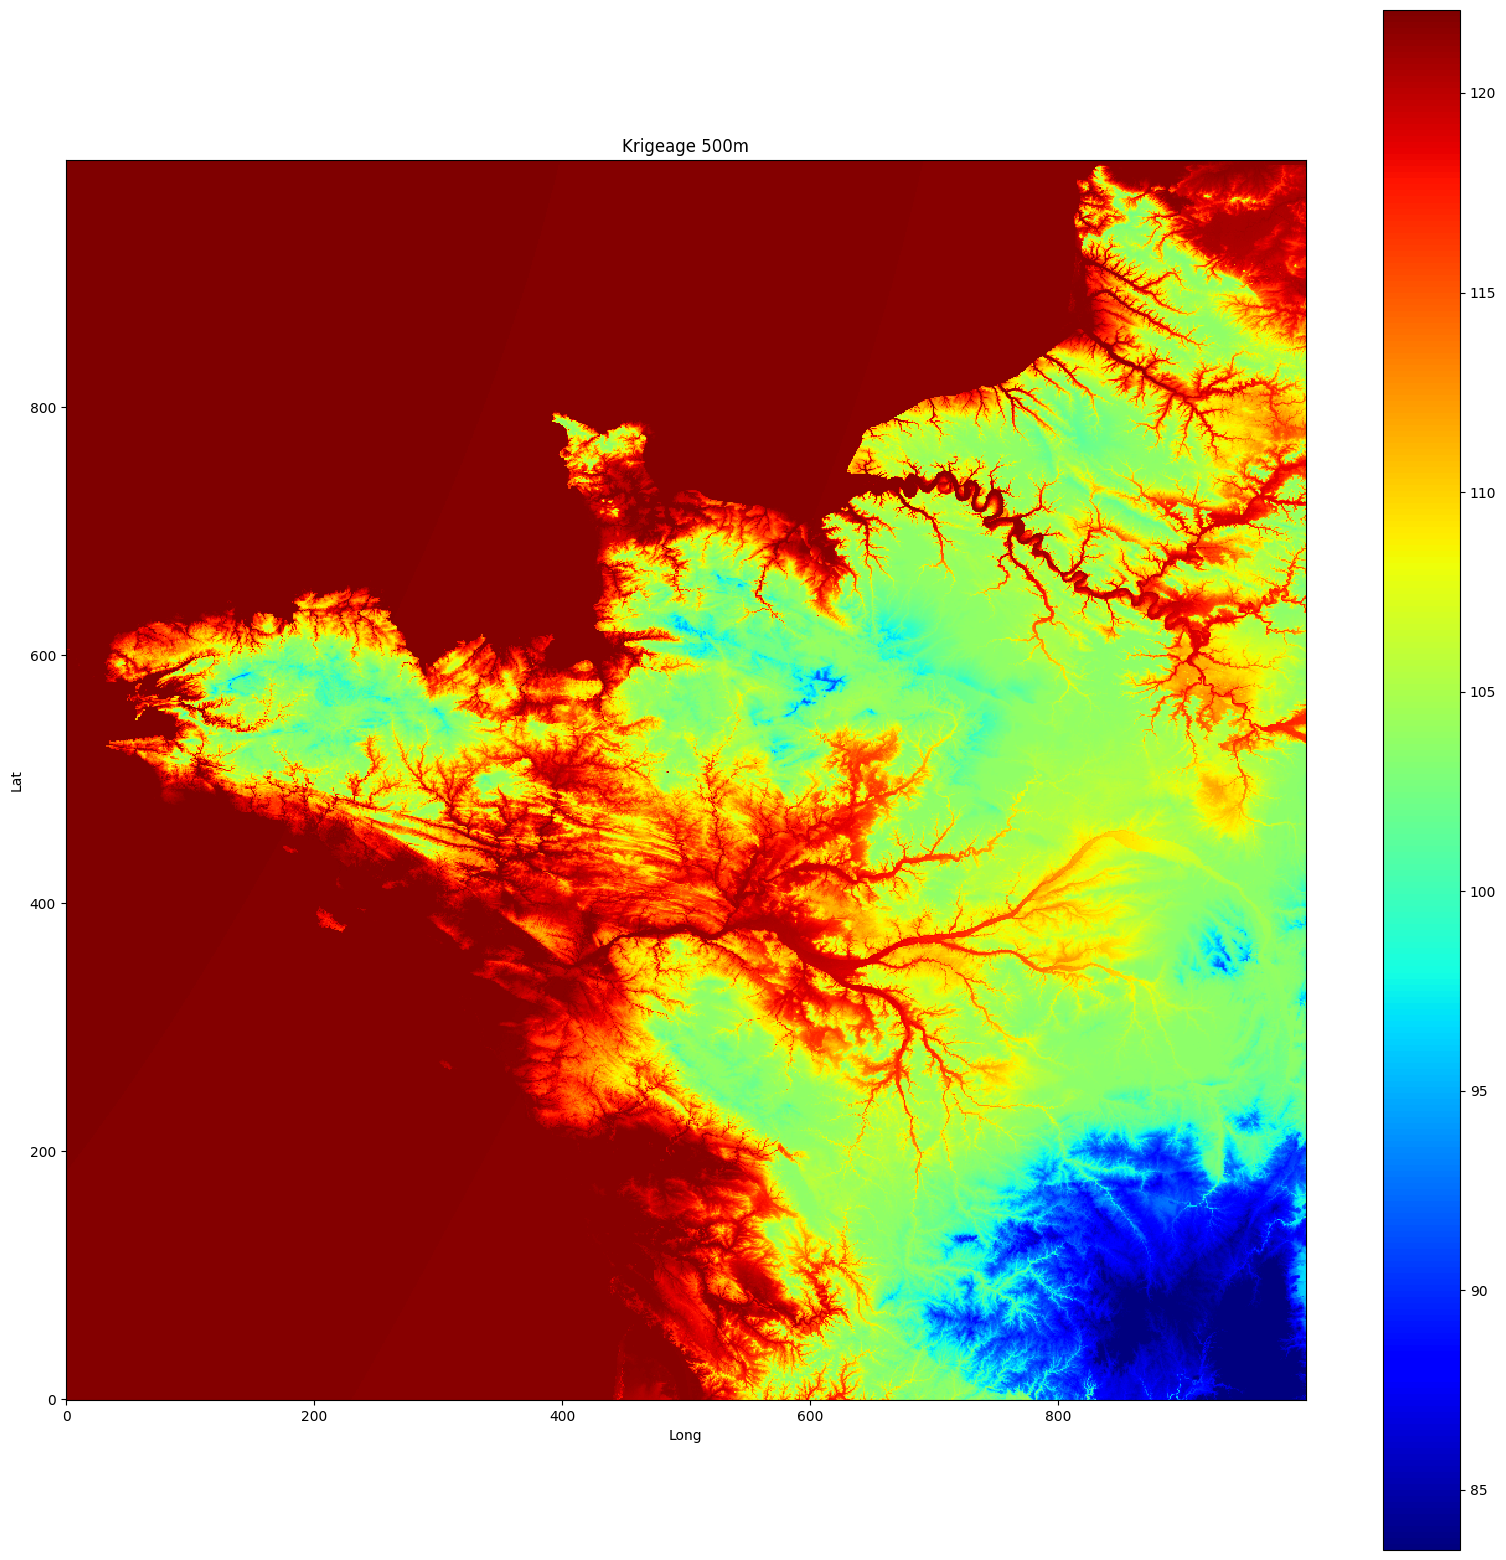

In [33]:
plt.figure(figsize=(20,20))
plt.imshow(k3d3, origin="lower", cmap='jet', interpolation='nearest')
plt.colorbar()
plt.title("Krigeage 500m")
plt.xlabel("Long")
plt.ylabel("Lat")
plt.show()


Critiques:
Biais du MNT par rapport au cours d'eau
Problème de valeur de vent (max de abse a 195, et les prédictions sont au max a 130)